# 🌱 Regressão Linear para Irrigação
Este notebook analisa a relação entre as **Horas de Irrigação** e a **Área Irrigada por Ângulo** usando regressão linear simples.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import shapiro, kstest
from statsmodels.graphics.gofplots import qqplot


## 📂 Carregamento dos Dados

In [2]:
df = pd.read_csv('dados_de_irrigacao.csv')
df.head()

,Horas de Irrigação,Área Irrigada,Área Irrigada por Ângulo
0,1,100,66.666667
1,2,200,133.333333
2,3,300,200.000000
3,4,400,266.666667
4,5,500,333.333333


## 📊 Análise Exploratória dos Dados (EDA)

In [3]:
df.describe()

,Horas de Irrigação,Área Irrigada,Área Irrigada por Ângulo
count,299.000000,299.000000,299.000000
mean,150.000000,15000.000000,10000.000000
std,86.458082,8645.808233,5763.872155
min,1.000000,100.000000,66.666667
25%,75.500000,7550.000000,5033.333333
50%,150.000000,15000.000000,10000.000000
75%,224.500000,22450.000000,14966.666667
max,299.000000,29900.000000,19933.333333


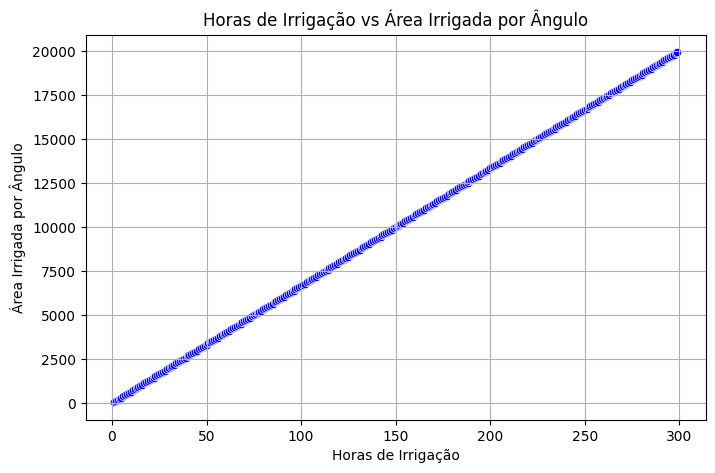

In [4]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Horas de Irrigação', y='Área Irrigada por Ângulo', data=df, color='blue')
plt.title('Horas de Irrigação vs Área Irrigada por Ângulo')
plt.xlabel('Horas de Irrigação')
plt.ylabel('Área Irrigada por Ângulo')
plt.grid(True)
plt.show()

In [5]:
df.corr(numeric_only=True)

,Horas de Irrigação,Área Irrigada,Área Irrigada por Ângulo
Horas de Irrigação,1.0,1.0,1.0
Área Irrigada,1.0,1.0,1.0
Área Irrigada por Ângulo,1.0,1.0,1.0


## 🤖 Construção do Modelo de Regressão Linear

In [6]:
X = df[['Horas de Irrigação']].values.reshape(-1, 1)
y = df[['Área Irrigada por Ângulo']].values.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
modelo = LinearRegression()
modelo.fit(X_train, y_train)
a = modelo.coef_[0][0]
b = modelo.intercept_[0]
print(f'Equação da reta: Área = {a:.2f} * Horas + {b:.2f}')

Equação da reta: Área = 66.67 * Horas + 0.00


## 📈 Avaliação do Modelo

In [7]:
y_pred = modelo.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f'MAE: {mae:.4f}\nMSE: {mse:.4e}\nRMSE: {rmse:.4e}\nR²: {r2:.4f}')

MAE: 0.0000
MSE: 8.1795e-24
RMSE: 2.8600e-12
R²: 1.0000


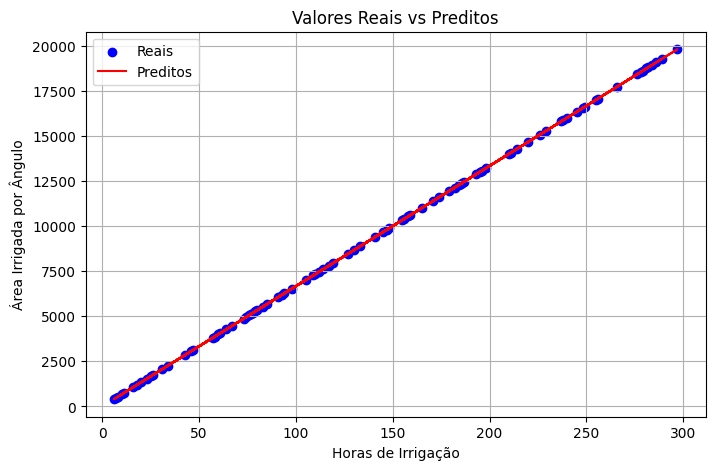

In [8]:
plt.figure(figsize=(8,5))
plt.scatter(X_test, y_test, color='blue', label='Reais')
plt.plot(X_test, y_pred, color='red', label='Preditos')
plt.title('Valores Reais vs Preditos')
plt.xlabel('Horas de Irrigação')
plt.ylabel('Área Irrigada por Ângulo')
plt.legend()
plt.grid(True)
plt.show()

## 📉 Análise de Resíduos

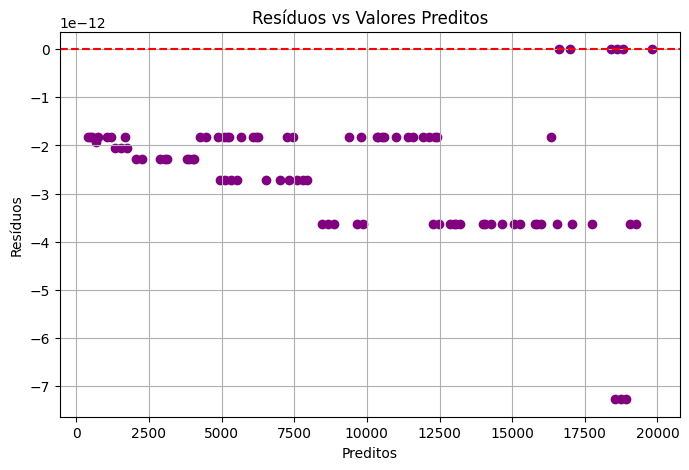

In [9]:
residuos = y_test - y_pred
plt.figure(figsize=(8,5))
plt.scatter(y_pred, residuos, color='purple')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Resíduos vs Valores Preditos')
plt.xlabel('Preditos')
plt.ylabel('Resíduos')
plt.grid(True)
plt.show()

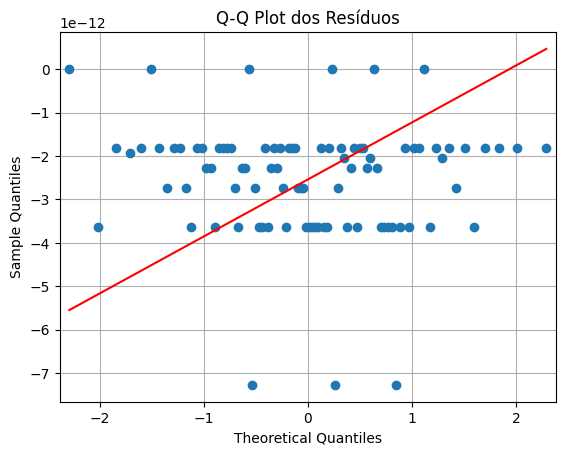

In [10]:
qqplot(residuos, line='s')
plt.title('Q-Q Plot dos Resíduos')
plt.grid(True)
plt.show()

In [11]:
shapiro_stat, shapiro_p = shapiro(residuos)
kstest_stat, kstest_p = kstest(residuos.flatten(), 'norm')
print(f'Shapiro-Wilk p-valor: {shapiro_p:.4e}')
print(f'Kolmogorov-Smirnov p-valor: {kstest_p:.4e}')

Shapiro-Wilk p-valor: 3.1238e-09
Kolmogorov-Smirnov p-valor: 2.4870e-21


## 🔮 Predição de Exemplo

In [12]:
previsao = modelo.predict(np.array([[15]]))[0][0]
print(f'Área irrigada por ângulo prevista para 15 horas de irrigação: {previsao:.2f}')

Área irrigada por ângulo prevista para 15 horas de irrigação: 1000.00
